#### Installed psycopg2 -  is a PostgreSQL driver. 

In [1]:
#pip install psycopg2

In [2]:
import pandas as pd
# creating a database config object and obtaining the params
import databaseconfig as cfg
from sqlalchemy import create_engine

In [3]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

#### Set all the properties in the databaseconfig file and reading the same here
sample of the file is here
database = "emp_dept_db"
user = "postgres"
host = "localhost"
port = "5432"
passw = "**********"

In [4]:
database_name = cfg.database
user = cfg.user
passw = cfg.passw
host = cfg.host
port = cfg.port



OBTAINING THE CONFIG PARAMS HERE AND MAKING A CONNECTION URL

In [5]:
#forming the url to the database
conn_str = f"postgresql://{user}:{passw}@{host}:{port}/{database_name}"
#print(conn_str)

#### Creating a connection to the database

In [6]:
engine = create_engine(conn_str)
connection = engine.connect()

##### Obtaining the resullts for average salary grouped by title.

In [7]:
query1 = "SELECT title, ROUND(AVG(salary),2)  FROM salaries INNER JOIN titles ON salaries.emp_no = titles.emp_no GROUP BY title"
employee_data =pd.read_sql_query(query1,connection)
employee_data.head()

title     round
0  Assistant Engineer  48493.20
1            Engineer  48539.78
2             Manager  51531.04
3     Senior Engineer  48506.75
4        Senior Staff  58503.29

##### Create a bar chart of average salary by title.

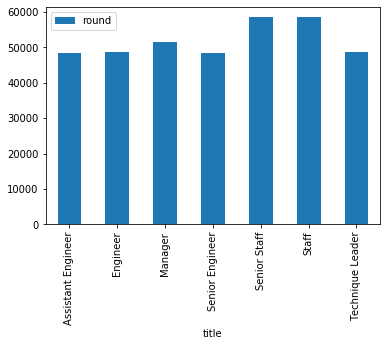

In [8]:

employee_data.plot(kind='bar',x='title',y='round')
plt.show()

In [9]:
query2 = "select * from employees where emp_no = '499942'"
employee_data2 =pd.read_sql_query(query2,connection)
employee_data2.head()

emp_no  birth_date first_name last_name gender   hire_date
0  499942  1963-01-10      April  Foolsday      F  1997-02-10